In [2]:
import pandas as pd

In [4]:
url = "https://raw.githubusercontent.com/codebasics/py/refs/heads/master/ML/FeatureEngineering/2_outliers_z_score/Exercise/bhp.csv"

In [6]:
df = pd.read_csv(url)
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [14]:
df2 = df[['price', 'price_per_sqft']]
df2.shape

(13200, 2)

In [16]:
min_threshold, max_threshold = df2.price_per_sqft.quantile([0.001, 0.999])
min_threshold, max_threshold

(1366.184, 50959.36200000098)

In [18]:
df3 = df2[(df2.price_per_sqft > min_threshold) & (df2.price_per_sqft < max_threshold)]
df3.shape

(13172, 2)

In [30]:
mn = df3.price_per_sqft.mean()
std = df3.price_per_sqft.std()
mn, std

(6663.6537351958705, 4141.020700174605)

In [34]:
df3.loc[:, 'z_score'] = (df3['price_per_sqft'] - mn) / std

In [36]:
df3.head()

,price,price_per_sqft,z_score
0,39.07,3699,-0.715923
1,120.00,4615,-0.494722
2,62.00,4305,-0.569583
3,95.00,6245,-0.101099
4,51.00,4250,-0.582864


In [38]:
df4 = df3[(df3.z_score > -4) & (df3.z_score < 4)]
df4.shape

(13047, 3)

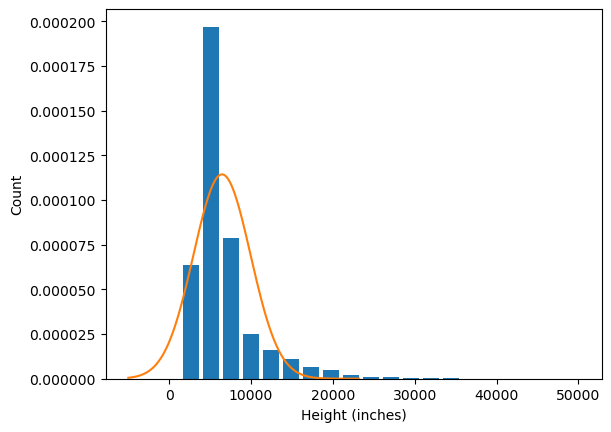

In [42]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df4.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df4.price_per_sqft.mean(),df4.price_per_sqft.std()));